In [1]:

import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
soap_dir="../../../mnt/su3-pro/colibre/L0012N0094/THERMAL_AGN/SOAP/"

data_h=sw.load(soap_dir+"/halo_properties_0127.hdf5")
host_id=data_h.soap.host_halo_index#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=data_h.spherical_overdensity_200_crit.total_mass

mainhalo_id=halo_id[(host_id==-1)*(mass>100)]
mainhalo_id


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=0.9999999999999997) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


array([ 509, 2692, 2863])

In [ ]:
#[  1,   3, 122, 127], S<-0.5
sgi=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",
    sg.SOAP(soap_dir+"/halo_properties_0127.hdf5",soap_index=3,extra_mask=None))
'''
sgi2=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",
    sg.SOAP(soap_dir+"/halo_properties_0127.hdf5",soap_index=509,extra_mask=None))
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
x_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.x)
mask_dm=np.isin(x_dm2,x_dm,invert=True)
x_dm=x_dm2[mask_dm]
y_dm=np.array(sgi2.dark_matter.cartesian_coordinates.y[mask_dm])
z_dm=np.array(sgi2.dark_matter.cartesian_coordinates.z[mask_dm])

x_g=np.array(sgi.gas.cartesian_coordinates.x)
x_g2=np.array(sgi2.gas.cartesian_coordinates.x)
mask_g=np.isin(x_g2,x_g,invert=True)
x_g=x_g2[mask_g]
y_g=np.array(sgi2.gas.cartesian_coordinates.y[mask_g])
z_gas=np.array(sgi2.gas.cartesian_coordinates.z[mask_g])

'''
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
y_dm=np.array(sgi.dark_matter.cartesian_coordinates.y)
z_dm=np.array(sgi.dark_matter.cartesian_coordinates.z)
x_g=np.array(sgi.gas.cartesian_coordinates.x)
y_g=np.array(sgi.gas.cartesian_coordinates.y)
z_g=np.array(sgi.gas.cartesian_coordinates.z)


'\nh_dm=ax.hist(r_dm,bins=500,range=(np.min(r_dm),np.max(r_dm))\n             )\nh_g=ax.hist(r_g,bins=500,range=(np.min(r_dm),np.max(r_dm)))\nbin=np.zeros(len(h_dm[0]))\nfor i in range(0,len(h_dm[0])):\n    bin[i]=(h_dm[1][i]+h_dm[1][i+1])/2\nrho_dm=h_dm[0]/4/np.pi/bin**2\nrho_g=h_g[0]/4/np.pi/bin**2\n'

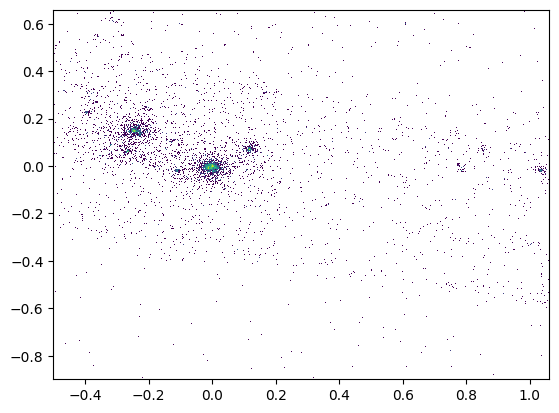

In [5]:
r_dm=np.sqrt(x_dm**2+y_dm**2+z_dm**2)
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)

import matplotlib.pyplot as plt
from matplotlib import colors


fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_dm,y_dm,norm=colors.LogNorm(),bins=500)

'''
h_dm=ax.hist(r_dm,bins=500,range=(np.min(r_dm),np.max(r_dm))
             )
h_g=ax.hist(r_g,bins=500,range=(np.min(r_dm),np.max(r_dm)))
bin=np.zeros(len(h_dm[0]))
for i in range(0,len(h_dm[0])):
    bin[i]=(h_dm[1][i]+h_dm[1][i+1])/2
rho_dm=h_dm[0]/4/np.pi/bin**2
rho_g=h_g[0]/4/np.pi/bin**2
'''


'\nplt.close()\nfig = plt.figure()\nax=plt.subplot(1,1,1)\nax.plot(bin,rho_dm,label="DM",color="blue")\nax.plot(bin,rho_g,label="Gas",color="Green")\nax.loglog()\nplt.show()\n'

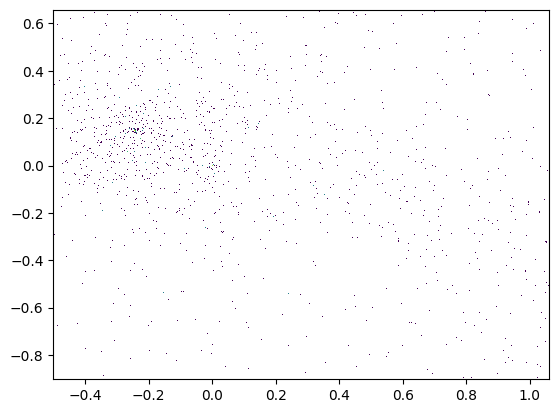

In [6]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_g,y_g,norm=colors.LogNorm(),bins=500)
'''
plt.close()
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(bin,rho_dm,label="DM",color="blue")
ax.plot(bin,rho_g,label="Gas",color="Green")
ax.loglog()
plt.show()
'''

/tmp/ipykernel_2020796/1942302548.py:4: RuntimeWarning: divide by zero encountered in divide
  ratio=rho_g/rho_dm
/tmp/ipykernel_2020796/1942302548.py:4: RuntimeWarning: invalid value encountered in divide
  ratio=rho_g/rho_dm


AttributeError: 'Axes' object has no attribute 'loglin'

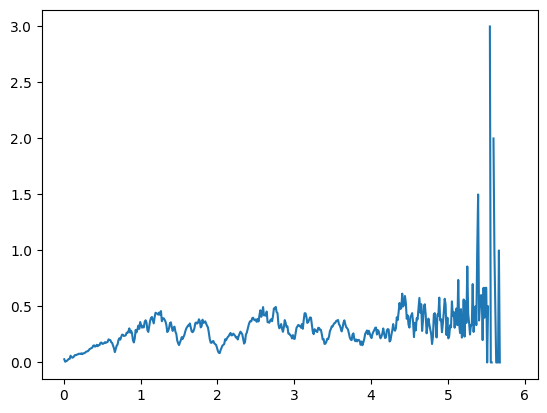

In [ ]:
from matplotlib import colormaps


ratio=rho_g/rho_dm


fig = plt.figure() 
ax=plt.subplot(1,1,1)
r=ax.plot(bin,ratio)#cutoff at 1
#ax.imshow(h_g[0],norm=colors.LogNorm())
ax.loglin()
plt.show()
